<a href="https://colab.research.google.com/github/fmejias/CienciasDeLosDatosTEC/blob/master/tree/master/BigData/Proyectos/Investigaci%C3%B3nPreliminar_BigData_MariaMora_FelipeMejias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Big Data
# Proyecto Programado

- Professor: Luis Chavarría.

- Student:  
    - Felipe Alberto Mejías Loría, Instituto Tecnológico de Costa Rica.
    - María Mora, Instituto Tecnológico de Costa Rica.

- January 16th, 2020

La minería de datos y el aprendizaje automático han sido utilizados de forma exitosa en múltiples proyectos orientados a la detección y prevención de delitos (McClendon y Meghanathan, 2015). Investigaciones previas en análisis de datos asociados a delitos han concluido que algunos factores, como son la educación, la pobreza y el desempleo pueden influir en el aumento o disminución de la tasa de delitos de una región (Suhong, Param, Parminder y Pooya, 2018).  El objetivo del presente proyecto es utilizar datos de criminalidad en Costa Rica combinados con datos socioeconómicos asociados a cantones para demostrar cuán efectivos y precisos pueden ser los algoritmos de aprendizaje automático en la predicción de tipos de delitos a nivel nacional. 

Para la realización del proyecto se analizaron diversas fuentes de datos buscando información sobre los cantones de Costa Rica por ejemplo: 

- El Ministerio de Planificación Nacional y Política Económica (Mideplan): En esta institución es posible encontrar datos sobre agricultura, industria manufacturera, comercio, desempleo abierto, salario promedio, entre otros, pero no fue posible encontrar datos organizados por cantón.

- El Organismo de Investigación Judicial (OIJ): El OIJ publica datos sobre criminalidad en Costa Rica que tienen como fuente las denuncias interpuestas directamente ante esta entidad nacional. Los datos recopilados por el OIJ están disponibles por provincia o cantón.

- El Instituto Nacional de Estadística y Censos de Costa Rica (INEC): El INEC es la institutión encargada a nivel nacional de la generación y divulgación de datos estadísticos obtenidos por medio de censos, encuestas y otros estudios sobre demografía, economía y otros. Al igual que en el OIJ los datos están disponibles por cantón.


Los datos utilizados en el análisis provienen del OIJ y del INEC que fueron las fuentes de datos seleccionadas por contar con datos de criminalidad y socioeconómicos asociados a cantones de Costa Rica.

El conjunto de datos de criminalidad del OIJ posee las siguientes columnas:

- Delito:Tipo de Delito
- SubDelito: Tipo de SubDelito
- Fecha: Fecha del Hecho
- Hora: Rango de 3 horas del Hecho
- Victima: Descripción de la Víctima
- SubVictima: Descripción de la SubVíctima
- Edad: Grupo de Edad que pertenece la Víctima
- Genero: Género de la Víctima
- Nacionalidad: Nacionalidad de la Víctima
- Provincia: Provincia del Lugar del Hecho
- Canton: Cantón del Lugar del Hecho
- Distrito: Distrito del Lugar del Hecho


Los tipos de delitos definidos por el OIJ y documentados en el conjunto de datos son los siguientes (OIJ, 2018):

- Asalto: Desapoderamiento ilegítimo con violencia sobre las personas de alguna de sus pertenencias. Consiste en  llevarse o intentar llevarse  en  circunstancias  de  confrontación cualquier cosa de valor que se encuentra bajo el control, custodia o cuidado de otra persona. En estos casos quienes ejercen esta acción utilizan la fuerza o amenaza de fuerza o violencia o ponen a la víctima en temor de daño inmediato.

- Hurto: Consiste en apoderarse de un bien sin utilizar fuerza en las cosas o violencia sobre las personas. De  presentarse estos elementos (fuerza y violencia) estaríamos en presencia de un robo o un asalto.

- Robo: Es la entrada ilícita ejerciendo fuerza sobre las cosas a una casa de habitación, bodega, local comercial, institución, otros.

- Tacha de vehículo: Es la sustracción mediante el ingreso ilícito al automotor utilizando mecanismos de fuerza    para sustraer pertenencias dentro del automóvil.

- Robo de Vehículo: Es el robo de un medio de transporte.

- Homicidio: Hecho delictivo que consiste en la privación de la vida de otra persona. 


El segundo conjunto de datos contiene información sobre indicadores económicos, según provincia y cantón. Los datos fueron generados por el INEC como resultado del censo realizado en el país en el año 2011. El conjunto de datos  posee las siguientes columnas: 

- Provincia, Cantón y Distrito
- Población de 15 años y más
- Tasa neta de participación
- Tasa de ocupación
- Tasa de desempleo abierto
- Porcentaje de poblacion economicamente inactiva
- Relación de depedencia económica


En esta investigación, implementaremos algoritmos de aprendizaje automático utilizando el mismo conjunto de características económicas por cantón y el conjunto de datos sobre criminalidad por cantón para realizar un estudio comparativo de los resultados obtenidos por algoritmo en la predicción de tipos de delitos a nivel nacional.  El objetivo predictivo del proyecto es el tipo de delito almacenado en la columna Delito. 

El resto del documento está organizado en las siguientes secciones:

- 1-) Instalación de PySpark
- 2-) Importación de las bibliotecas necesarias para la ejecución del proyecto
- 4-) Documentación de los datos de entrada
- 5-) Cargado y preprocesamiento de datos antes de cruzarlos
- 6-) Materialización de los datos en Postgresql
- 7-) Cálculo de estadísticas
- 8-) Función main() para ejecutar el programa principal
- 9-) Referencias

## **1-) Instalación de PySpark**

In [0]:
# Install necessary libraries. The user must change the variable SPARK_HOME according her environment.
import findspark

# Set SPARK_HOME. Needed to initialize Apache Spark.
#SPARK_PATH = 'C:\Users\mejiasf\Desktop\Spark\spark-2.4.4-bin-hadoop2.7'

SPARK_PATH = '/opt/spark'
findspark.init(SPARK_PATH)



# **2-) Importar bibliotecas necesarias para la ejecución del proyecto**

In [0]:
# Necessary Imports for the execution of the TP3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import findspark

from pandas.plotting import scatter_matrix
from datetime import datetime
from pyspark.sql import SparkSession, Row, dataframe
from pyspark.sql.functions import col, date_format, udf, array, explode, trim, lower, ltrim, rtrim
from pyspark.sql.types import DateType
from pyspark.sql.types import (StringType, IntegerType, FloatType, 
                               DecimalType, StructField, StructType)
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler
from pyspark.ml.feature import ChiSqSelector
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.stat import Correlation
from pyspark.ml.linalg import DenseVector, SparseVector, Vectors, VectorUDT


# **3-) Funciones utilitarias para la construcción de DataFrames**

In [0]:
POSTGRESQL_URL = "jdbc:postgresql://localhost/"
POSTGRESQL_USER = "postgres"
POSTGRESQL_PASSWORD = "big_data"

def create_spark_session():
    """
    This function builds a Spark Session
    return the main entry of a Spark DataFrame
    """
    spark = SparkSession \
      .builder \
      .appName("Basic JDBC pipeline") \
      .config("spark.driver.extraClassPath", "postgresql-42.1.4.jar") \
      .config("spark.executor.extraClassPath", "postgresql-42.1.4.jar") \
      .getOrCreate()
    return spark

def join_spark_data_frames(data_frame_1, data_frame_2,
                           using_column_data_frame_1,
                           using_column_data_frame_2):
    """
    This function joint two Spark Data Frames
    data_frame_1: Spark DataFrame 1
    data_frame_2: Spark DataFrame 2
    using_column_data_frame_1: Column from DataFrame 1 to compare
    using_column_data_frame_2: Column from DataFrame 2 to compare
    return the Spark DataFrame from the JOIN
    """
    using_columns_statement = using_column_data_frame_1 == using_column_data_frame_2
    joint_data_frame = data_frame_1.join(data_frame_2, using_columns_statement)

    # To remove duplicated columns
    joint_data_frame = joint_data_frame.drop(using_column_data_frame_1)

    return joint_data_frame

def write_spark_df_to_db(spark_df, table_name):
    """
    This function writes Spark dataframe to DB
    """
    spark_df \
        .write \
        .format("jdbc") \
        .mode('overwrite') \
        .option("url", POSTGRESQL_URL) \
        .option("user", POSTGRESQL_USER) \
        .option("password", POSTGRESQL_PASSWORD) \
        .option("dbtable", table_name) \
        .save()

def read_dataset_from_db(spark_session, table_name):
    """
    This function reads the clean dataset from the database
    """
    spark_df = spark_session \
               .read \
               .format("jdbc") \
               .option("url", POSTGRESQL_URL) \
               .option("user", POSTGRESQL_USER) \
               .option("password", POSTGRESQL_PASSWORD) \
               .option("dbtable", table_name) \
               .load()
    spark_df.show()
    return spark_df

# **4-) Datos de entrada**

In [0]:
def show_entry_data_description():
    """
    This function shows a description of all the entry data columns
    """
    
    # OIJ Dataset Explanation
    print("\na-) The first dataset contains information taken from the OIJ Police Statistics of Costa Rica.")
    
    print("\nb-) Columns description for OIJ dataset: \n")
    print("Delito: Descripción del Delito")
    print("SubDelito: Descripción del SubDelito")
    print("Fecha: Fecha del Hecho")
    print("Hora: Rango de 3 horas del Hecho")
    print("Victima: Descripción de la Víctima ")
    print("SubVictima: Descripción de la SubVíctima")
    print("Edad: Grupo de Edad que pertenece la Víctima")
    print("Genero: Género de la Víctima")
    print("Nacionalidad: Nacionalidad de la Víctima")
    print("Provincia: Provincia del Lugar del Hecho")
    print("Canton: Cantón del Lugar del Hecho")
    print("Distrito: Distrito del Lugar del Hecho")
    
    # INEC Dataset Explanation
    print("\nc-) The second dataset contains information about Economic Indicators according to province, canton")
    print("    and district taken from INEC.")
    
    print("\nb-) Columns description for INEC dataset: \n")
    print("Columna 1: Provincia, Cantón y Distrito")
    print("Columna 2: Población de 15 años y más")
    print("Columna 3: Tasa neta de participación")
    print("Columna 4: Tasa de ocupación")
    print("Columna 5: Tasa de desempleo abierto")
    print("Columna 6: Porcentaje de poblacion economicamente inactiva")
    print("Columna 7: Relación de depedencia económica")
    
    # Show which columns is going to be predicted
    print("\ne-) The column that is going to be predicted is the type of Delito in San Jose province according to the canton.\n")

# **5-) Cargado y preprocesamiento de datos antes de cruzarlos**

In [0]:
OIJ_DATAFRAME_UNNECESSARY_COLUMNS = ["Fecha", "Hora", "SubVictima", "Provincia"]
INEC_DATAFRAME_UNNECESSARY_COLUMNS = ["Porcentaje de poblacion economicamente inactiva",
                                      "Relacion de dependencia economica",
                                      "Porcentaje de poblacion ocupada - Sector Primario",
                                      "Porcentaje de poblacion ocupada - Sector Secundario",
                                      "Porcentaje de poblacion ocupada - Sector Terciario"]

def convert_categorical_values_to_numerical_from_df(spark_df, categorical_columns_list):
    """
    This function creates a Spark DataFrame with all values as numerical
    spark_df: Spark DataFrame
    return the Spark DataFrame with all values as numerical
    """
    # Convert categorical columns to numerical values
    for categorical_column in categorical_columns_list:
        new_column_name = "{column_name}_index".format(column_name = categorical_column)
        indexer = StringIndexer(inputCol=categorical_column, outputCol=new_column_name)
        spark_df = indexer.fit(spark_df).transform(spark_df)
    
    # Remove categorical columns
    columns_to_drop = categorical_columns_list
    spark_df = spark_df.drop(*columns_to_drop)
    
    # Rename new numerical columns
    for categorical_column in categorical_columns_list:
        new_column_name = "{column_name}_index".format(column_name = categorical_column)
        spark_df = spark_df.withColumnRenamed(new_column_name, categorical_column)
    
    # Show converted data
    print("- Show that the data has been converted successfully from categorical to numerical: \n")
    spark_df.select(categorical_columns_list).show()

    return spark_df

def rename_oij_spark_dataframe_columns(spark_df):
    """
    This function is necessary as OIJ Dataset is outdated since the CSV
    they provide does not bring the time field
    spark_df: Spark DataFrame
    return the Spark DataFrame with right columns names
    """
    spark_df = spark_df.withColumnRenamed('Victima', 'Hora')
    spark_df = spark_df.withColumnRenamed('SubVictima', 'Victima')
    spark_df = spark_df.withColumnRenamed('Edad', 'SubVictima')
    spark_df = spark_df.withColumnRenamed('Genero', 'Edad')
    spark_df = spark_df.withColumnRenamed('Nacionalidad', 'Genero')
    spark_df = spark_df.withColumnRenamed('Provincia', 'Nacionalidad')
    spark_df = spark_df.withColumnRenamed('Canton', 'Provincia')
    spark_df = spark_df.withColumnRenamed('Distrito', 'Canton')
    return spark_df

def remove_spark_dataframe_trailing_whitespaces(spark_df):
    """
    This function removes all trailing whitespaces in Spark DataFrame Columns
    spark_df: Spark DataFrame
    return the Spark DataFrame
    """
    for column in spark_df.columns:
        spark_df = spark_df.withColumn(column, trim(col(column)).cast(spark_df.schema[column].dataType))
    return spark_df

def convert_spark_dataframe_to_lower_case(spark_df):
    """
    This function converts to lower case Spark DataFrame Columns
    spark_df: Spark DataFrame
    columns_list: Columns List
    return the Spark DataFrame
    """
    for column in spark_df.columns:
        spark_df =  spark_df.withColumn(column, lower(col(column)).cast(spark_df.schema[column].dataType))
    return spark_df
    
def create_and_clean_spark_dataframe_from_csv(spark_session,
                                              csv_file_name,
                                              schema_types_list):
    """
    This function creates a Spark DataFrame from Dataset CSV file
    spark_session: Spark Session
    return the Spark DataFrame
    """
    print("\n- Loading and cleaning CSV input file: {name}".format(name = csv_file_name))
    
    spark_df = spark_session \
      .read \
      .format("csv") \
      .option("path", csv_file_name) \
      .option("header", True) \
      .schema(StructType(schema_types_list)) \
      .load()
    
    # Rename OIJ Spark DataFrame Columns
    spark_df = rename_oij_spark_dataframe_columns(spark_df) \
               if csv_file_name == "datos_delitos_oij_2011.csv" \
               else spark_df
    
    # Clean whitespaces
    spark_df = remove_spark_dataframe_trailing_whitespaces(spark_df)
    
    # Convert to lower case
    spark_df = convert_spark_dataframe_to_lower_case(spark_df)
    
    return spark_df

def remove_unnecessary_columns(spark_df, columns_to_remove_list):
    """
    This function removes unnecessary columns for DataFrame
    """
    columns_to_drop = columns_to_remove_list
    spark_df = spark_df.drop(*columns_to_drop)
    return spark_df

def preprocessing_oij_data(spark_session):
    """
    This function completes data preprocessing before training model
    for OIJ Dataset
    """
    schema_types_list = [StructField("Delito", StringType()),
                         StructField("SubDelito", StringType()),
                         StructField("Fecha", StringType()),
                         StructField("Victima", StringType()),
                         StructField("SubVictima", StringType()),
                         StructField("Edad", StringType()),
                         StructField("Genero", StringType()),
                         StructField("Nacionalidad", StringType()),
                         StructField("Provincia", StringType()),
                         StructField("Canton", StringType()),
                         StructField("Distrito", StringType())]
    
    oij_spark_df = create_and_clean_spark_dataframe_from_csv(spark_session,
                                                             "datos_delitos_oij_2011.csv",
                                                             schema_types_list)
    
    oij_spark_df = remove_unnecessary_columns(oij_spark_df, OIJ_DATAFRAME_UNNECESSARY_COLUMNS)
    
    return oij_spark_df

def preprocessing_inec_data(spark_session):
    """
    This function completes data preprocessing before training model
    for INEC Dataset
    """
    schema_types_list = [StructField("Canton", StringType()),
                         StructField("Poblacion de 15 anos y mas", IntegerType()),
                         StructField("Tasa neta de participacion", FloatType()),
                         StructField("Tasa de ocupacion", FloatType()),
                         StructField("Tasa de desempleo abierto", FloatType()),
                         StructField("Porcentaje de poblacion economicamente inactiva", FloatType()),
                         StructField("Relacion de dependencia economica", FloatType()),
                         StructField("Porcentaje de poblacion ocupada - Sector Primario", FloatType()),
                         StructField("Porcentaje de poblacion ocupada - Sector Secundario", FloatType()),
                         StructField("Porcentaje de poblacion ocupada - Sector Terciario", FloatType())]
    
    inec_spark_df = create_and_clean_spark_dataframe_from_csv(spark_session,
                                                             "datos_socioeconomicos_inec_2011.csv",
                                                             schema_types_list)
    
    inec_spark_df = remove_unnecessary_columns(inec_spark_df, INEC_DATAFRAME_UNNECESSARY_COLUMNS)
    
    return inec_spark_df

def show_preprocessing_spark_dataframe(spark_df, columns_list):
    """
    This function completes data preprocessing before training model
    """
    print("\n1-) Definition of schema: \n")
    spark_df.printSchema()
    
    print("2-) Show that the data has been loaded successfully by selecting a couple of rows: \n")
    spark_df.select(columns_list).show()
    

def data_preprocessing(spark_session):
    """
    This function completes data preprocessing for INEC and OIJ before training model
    """
    # Loading and cleaning OIJ CSV input file data.
    oij_spark_df = preprocessing_oij_data(spark_session)
    
    # Show Preprocessing OIJ DataFrame
    show_preprocessing_spark_dataframe(oij_spark_df,
                                       ["Delito", "SubDelito", "Genero", "Canton"])
    
    # Convert all OIJ Categorical Values to Numerical Values
    oij_spark_df = convert_categorical_values_to_numerical_from_df(oij_spark_df,
                                                                   ["Delito", "SubDelito",
                                                                    "Victima", "Edad", "Genero",
                                                                    "Nacionalidad"])
    
    # Loading and cleaning INEC CSV input file data.
    inec_spark_df = preprocessing_inec_data(spark_session)
    
    # Show Preprocessing INEC DataFrame
    show_preprocessing_spark_dataframe(inec_spark_df,
                                       ["Canton",
                                        "Poblacion de 15 anos y mas",
                                        "Tasa de desempleo abierto"])
    
    return oij_spark_df, inec_spark_df

# **6-) Materialización en Postgresql**

In [0]:
FEATURES_LIST = ['SubDelito', 'Victima', 'Edad',
                 'Genero', 'Nacionalidad',
                 'Poblacion de 15 anos y mas', 'Tasa neta de participacion',
                 'Tasa de ocupacion', 'Tasa de desempleo abierto', 'Canton', 'Delito']

def create_joint_spark_data_frames(oij_data_frame, inec_data_frame):
    """
    This function creates the data frame of the joint of the two datasets
    oij_data_frame: DataFrame with the students info
    inec_data_frame: DataFrame with the courses info
    return the joint Spark DataFrame
    """

    print("\nThe data union between OIJ DataFrame and INEC DataFrame is the following: \n")
    joint_oij_and_inec_df = join_spark_data_frames(oij_data_frame,
                                                   inec_data_frame,
                                                   oij_data_frame.Canton,
                                                   inec_data_frame.Canton)
    
    joint_oij_and_inec_df.select(["Delito", "Genero", "Canton",
                                  "Poblacion de 15 anos y mas",
                                  "Tasa de desempleo abierto",
                                  "Tasa de ocupacion"]).show(20)

    return joint_oij_and_inec_df

def transform_sparse_vector_df_to_dense_vector_df(spark_df):
    """
    This function transforms a sparse vector to a dense vector df
    """
    toDense = lambda v: Vectors.dense(v.toArray())
    toDenseUdf = udf(toDense, VectorUDT())
    spark_df = spark_df.withColumn('features', toDenseUdf('features'))
    return spark_df

def transform_spark_df_to_features_vector_df(spark_df, remove_delito=False):
    """
    This function transforms a spark df to a features vector df
    """
    assembler = VectorAssembler(
        inputCols=FEATURES_LIST[:-1] if remove_delito else \
                  FEATURES_LIST,
        outputCol='features')
    
    vector_df = assembler.transform(spark_df)
    vector_df = vector_df.select(['features', 'Delito'])
    
    # Converte Sparse Vectors to Dense Vectors
    vector_df = transform_sparse_vector_df_to_dense_vector_df(vector_df)

    return vector_df

def normalize_data(spark_df):
    """
    This function normalize data before training the model
    """
    vector_df = transform_spark_df_to_features_vector_df(spark_df, remove_delito=True)
    standard_scaler = StandardScaler(inputCol='features', outputCol='scaled_features')
    scale_model = standard_scaler.fit(vector_df)
    scaled_df = scale_model.transform(vector_df)
    
    return scaled_df

def convert_normalized_df_to_valid_table_for_db(normalized_df):
    """
    This function converts normalize features vector into a valid DF for DB
    """
    normalized_valid_db_format_df = normalized_df.select('scaled_features', 'Delito')
    normalized_lambda_function = lambda x:[float(y) for y in x['scaled_features']]+[x['Delito']]
    normalized_valid_db_format_df = normalized_valid_db_format_df.rdd.map(normalized_lambda_function).toDF(FEATURES_LIST)
    
    return normalized_valid_db_format_df

def write_and_read_oij_and_inec_df(spark_session, oij_spark_df, inec_spark_df):
    """
    This function write and read OIJ and INEC DF to DB
    """
    # Writing OIJ and INEC Dataframes to DB first
    print("\n- Before joining the data, is important to write to the DB first. ")
    write_spark_df_to_db(oij_spark_df, "oij")
    write_spark_df_to_db(inec_spark_df, "inec")
    
    # Reading OIJ and INEC Dataframes from DB
    print("\n- After writing OIJ and INEC to the DB, now is necessary to read those clean datasets. ")
    print("\n- OIJ Dataset from DB is: ")
    read_dataset_from_db(spark_session, "oij")
    print("\n- INEC Dataset from DB is: ")
    read_dataset_from_db(spark_session, "inec")
    
    return oij_spark_df, inec_spark_df

def materialization_to_postgresql(spark_session, oij_spark_df, inec_spark_df):
    """
    This function materialize data to write to DB
    """
    # Writing and Reading OIJ and INEC Dataframes
    oij_spark_df, inec_spark_df = write_and_read_oij_and_inec_df(spark_session,
                                                                 oij_spark_df, inec_spark_df)
    
    # Joint Spark Data Frames
    joint_data_frame = create_joint_spark_data_frames(oij_spark_df,
                                                      inec_spark_df)
    
    # Convert Canton Categorical Value to Numerical Values
    joint_data_frame = convert_categorical_values_to_numerical_from_df(joint_data_frame,
                                                                       ["Canton"])
    
    # Normalizing the data
    print("\n- After normalizing the data, the DataFrame looks like this: \n")
    normalized_df = normalize_data(joint_data_frame)
    normalized_df.show()
    
    # Convert to valid format for DB
    print("\ng-) Writing to DB: ")
    print("\ng.1-) Before writing the normalized Dataframe, is necessary to convert it to a valid table for DB: ")
    normalized_valid_db_df = convert_normalized_df_to_valid_table_for_db(normalized_df)
    print("- After convert it to a valid table for DB, the DataFrame looks like this: \n")
    normalized_valid_db_df.select(FEATURES_LIST[:-5]).show()
    
    # Writing to DB
    write_spark_df_to_db(normalized_valid_db_df, "datos_cruzados")
    print("- In order to check that this table was written correctly into DB,")
    print("  you can go to PostgreSQL and check the table named datos_cruzados.")
    print("  It should look exactly the same.\n")


# **7-) Calculo de estadísticas**

In [0]:
def statistics_computation(spark_session, oij_data_frame, inec_data_frame): 
   # join data frames
   joint_data_frame = create_joint_spark_data_frames(oij_data_frame, inec_data_frame)
   joint_data_frame.describe().select("Summary","Delito","SubDelito","Victima", "Edad").show()
   joint_data_frame.describe().select("Summary","Genero","Nacionalidad","Canton","Poblacion de 15 anos y mas").show()
   joint_data_frame.describe().select("Summary","Tasa neta de participacion","Tasa de ocupacion","Tasa de desempleo abierto").show()

   # Convert Canton Categorical Value to Numerical Values
   joint_data_frame = convert_categorical_values_to_numerical_from_df(joint_data_frame,["Canton"])   

   # Compute Pearson Matrix, dependence between multiple variables at the same time.
   print("\n- Pearson Correlation Matrix: \n")

   vector_df = transform_spark_df_to_features_vector_df(joint_data_frame) 
   pearson_matrix = Correlation.corr(vector_df, 'features').collect()[0][0]
   
   sns.heatmap(pearson_matrix.toArray(), annot=True, fmt=".2f", cmap='viridis') 

# **8-) Función main() para ejecutar el programa principal**

Step 1: Entry Data Description

a-) The first dataset contains information taken from the OIJ Police Statistics of Costa Rica.

b-) Columns description for OIJ dataset: 

Delito: Descripción del Delito
SubDelito: Descripción del SubDelito
Fecha: Fecha del Hecho
Hora: Rango de 3 horas del Hecho
Victima: Descripción de la Víctima 
SubVictima: Descripción de la SubVíctima
Edad: Grupo de Edad que pertenece la Víctima
Genero: Género de la Víctima
Nacionalidad: Nacionalidad de la Víctima
Provincia: Provincia del Lugar del Hecho
Canton: Cantón del Lugar del Hecho
Distrito: Distrito del Lugar del Hecho

c-) The second dataset contains information about Economic Indicators according to province, canton
    and district taken from INEC.

b-) Columns description for INEC dataset: 

Columna 1: Provincia, Cantón y Distrito
Columna 2: Población de 15 años y más
Columna 3: Tasa neta de participación
Columna 4: Tasa de ocupación
Columna 5: Tasa de desempleo abierto
Columna 6: Porcentaje de poblacion e

+-------------------+--------------------------+--------------------------+-----------------+-------------------------+
|             Canton|Poblacion de 15 anos y mas|Tasa neta de participacion|Tasa de ocupacion|Tasa de desempleo abierto|
+-------------------+--------------------------+--------------------------+-----------------+-------------------------+
|           san jose|                    225856|                      56.7|             54.5|                      3.9|
|             escazu|                     44797|                      60.7|             58.9|                      3.0|
|       desamparados|                    159292|                      57.0|             54.7|                      4.0|
|           puriscal|                     25774|                      50.7|             49.1|                      3.1|
|            tarrazu|                     11800|                      51.2|             49.7|                      2.8|
|             aserri|                   

- In order to check that this table was written correctly into DB,
  you can go to PostgreSQL and check the table named datos_cruzados.
  It should look exactly the same.

Step 4: Statistics

The data union between OIJ DataFrame and INEC DataFrame is the following: 

+------+------+-------------+--------------------------+-------------------------+-----------------+
|Delito|Genero|       Canton|Poblacion de 15 anos y mas|Tasa de desempleo abierto|Tasa de ocupacion|
+------+------+-------------+--------------------------+-------------------------+-----------------+
|   0.0|   0.0|perez zeledon|                     98186|                      3.4|             46.4|
|   0.0|   1.0|     san jose|                    225856|                      3.9|             54.5|
|   0.0|   0.0|     san jose|                    225856|                      3.9|             54.5|
|   0.0|   0.0|     san jose|                    225856|                      3.9|             54.5|
|   0.0|   0.0|   currida

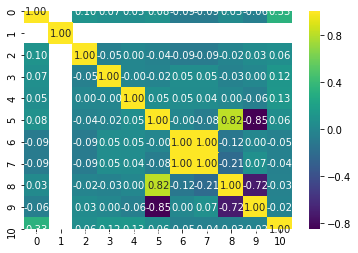

In [0]:
def main():
    """
    This function extract data and train a model using PySpark
    """
    print("Step 1: Entry Data Description")
    show_entry_data_description()
    
    print("Step 2: Data Preprocessing")
    spark_session = create_spark_session()
    oij_spark_df, inec_spark_df = data_preprocessing(spark_session)
    
    print("Step 3: Materialization to PostgreSQL")
    materialization_to_postgresql(spark_session,
                                  oij_spark_df,
                                  inec_spark_df)
    
    print("Step 4: Statistics")
    statistics_computation(spark_session,
                           oij_spark_df,
                           inec_spark_df)
    
    
# Execute main program
main()

# **10) Referencias**

McClendon, L y Meghanathan, N (2015). Using Machine Learning Algorithms to Analyze Crime Data. Recuperado de https://www.researchgate.net/publication/275220711_Using_Machine_Learning_Algorithms_to_Analyze_Crime_Data

Organismo de Investigación Judicial (2018). Recuperado de https://sitiooij.poder-judicial.go.cr/index.php/apertura/transparencia/estadisticas-policiales

Stalidis,P., Semertzidis, T., and Daras, P. (2018). Examining Deep Le,P.arning Architectures for CrimeClassification and Prediction. Recuperado de https://arxiv.org/pdf/1812.00602.pdf

Suhong, K., Param, J., Parminder, K. y Pooya, T. (2018).Crime Analysis Through Machine Learning. IEEE 9th Annual Information Technology, Electronics and Mobile Communication Conference (IEMCON) 

